# Read the library

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt


## read the data

In [2]:
df=pd.read_excel('DS - Assignment Part 1 data set.xlsx')
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


# EDA

In [3]:
# shape of thr dataset
df.shape

(414, 9)

In [4]:
# Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [5]:
#Correlation Matrix
df.corr()["House price of unit area"]

Transaction date                            0.087529
House Age                                  -0.210567
Distance from nearest Metro station (km)   -0.673613
Number of convenience stores                0.571005
latitude                                    0.546307
longitude                                   0.523287
Number of bedrooms                          0.050265
House size (sqft)                           0.046489
House price of unit area                    1.000000
Name: House price of unit area, dtype: float64

In [6]:
# Dropping column= Transaction date
df.drop("Transaction date",inplace=True,axis=1)

In [7]:
# Description of data
df.describe()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


In [8]:
# Checking for null values
# no null values
df.isnull().sum()

House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

In [9]:
#Create a function to convert House Age which is in years to convert into months.
import math
def age(x):
    h_age = math.modf(x)
    return h_age[1]*12+h_age[0]*10

In [10]:
df["HouseNewAge"]=df["House Age"].map(age)

In [11]:
df.head()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,HouseNewAge
0,32.0,84.87882,10,24.98298,121.54024,1,575,37.9,384.0
1,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2,233.0
2,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3,159.0
3,13.3,561.98450,5,24.98746,121.54391,2,875,54.8,159.0
4,5.0,390.56840,5,24.97937,121.54245,1,491,43.1,60.0


In [12]:
df.drop("House Age",inplace=True,axis=1)

In [13]:
# Univariate Analysis

#  Distance from nearest Metro station (km)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Distance from nearest Metro station (km)', ylabel='Density'>

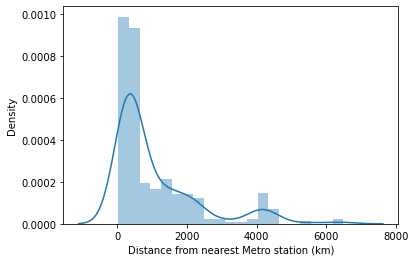

In [14]:
# Distribution plot of Distance_from_nearest_Metro_station_(km)
sns.distplot(df["Distance from nearest Metro station (km)"])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Distance from nearest Metro station (km)', ylabel='House price of unit area'>

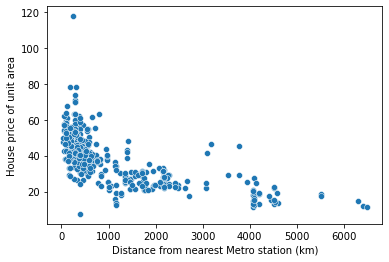

In [15]:
# Scatter plot between Distance_from_nearest_Metro_station_(km) and House price of unit area.
sns.scatterplot(df["Distance from nearest Metro station (km)"],df["House price of unit area"])
# face outlier

<AxesSubplot:>

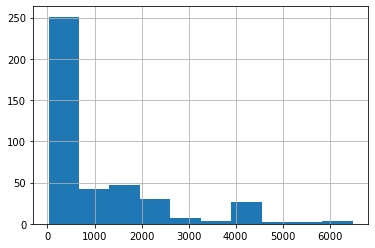

In [16]:
df['Distance from nearest Metro station (km)'].hist()

<AxesSubplot:>

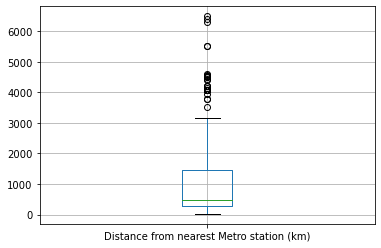

In [17]:
# Boxplot ofDistance_from_nearest_Metro_station_(km)
df.boxplot(column=["Distance from nearest Metro station (km)"])

In [18]:
df.shape

(414, 8)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Number of convenience stores', ylabel='Density'>

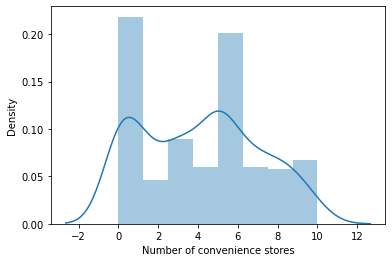

In [19]:
# Distribution plot of Number of convenience stores.
sns.distplot(df["Number of convenience stores"])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Number of convenience stores', ylabel='House price of unit area'>

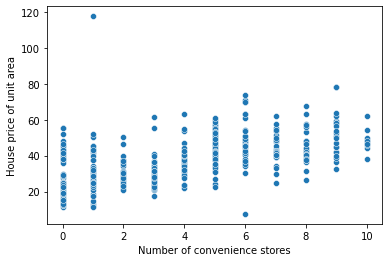

In [20]:
# Scatter plot between Number of convenience stores & House price of unit area
sns.scatterplot(df["Number of convenience stores"],df["House price of unit area"])

<AxesSubplot:>

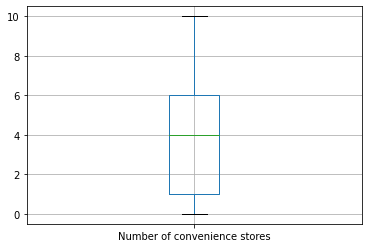

In [21]:
# Boxplot of Number of convenience stores
df.boxplot(column=["Number of convenience stores"])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Number of bedrooms', ylabel='House price of unit area'>

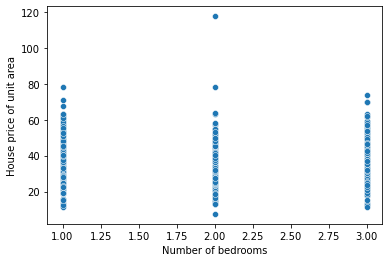

In [22]:
# Scatter plot between Number of bedrooms & House price of unit area
sns.scatterplot(df["Number of bedrooms"],df["House price of unit area"])
# 3 unique no of bedrooms 1,2,3

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='House size (sqft)', ylabel='House price of unit area'>

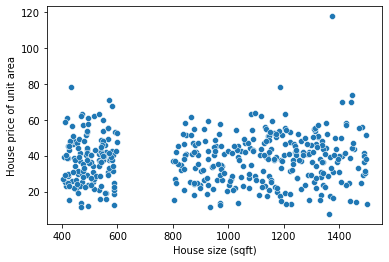

In [23]:
# Scatter plot between House size (sqft) & House price of unit area.
sns.scatterplot(df["House size (sqft)"],df["House price of unit area"])

<AxesSubplot:>

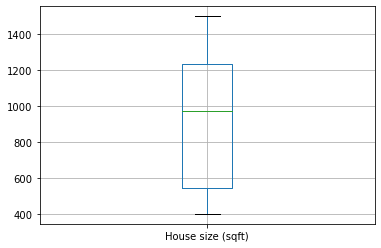

In [24]:
# Boxplot of Number of House size (sqft)
df.boxplot(column=["House size (sqft)"])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='House price of unit area', ylabel='Density'>

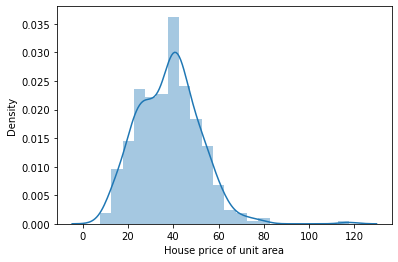

In [25]:
# Distribution plot of House price of unit area
sns.distplot(df["House price of unit area"])

<AxesSubplot:>

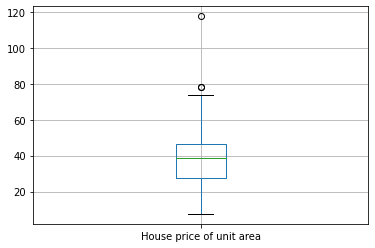

In [26]:
# Boxplot of House price of unit area
df.boxplot(column="House price of unit area")

In [27]:
df.describe()

,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,HouseNewAge
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193,211.710145
std,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488,136.586182
min,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000,0.000000
25%,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000,108.250000
50%,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000,193.000000
75%,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000,337.500000
max,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000,524.000000


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='HouseNewAge', ylabel='Density'>

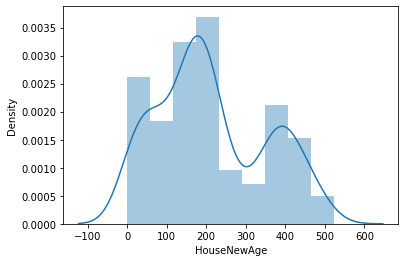

In [28]:
# Distribution plot of House_Age_Months
sns.distplot(df["HouseNewAge"])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HouseNewAge'>

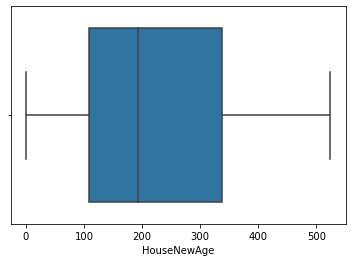

In [29]:
# Boxplot of House_Age_Months
sns.boxplot(df["HouseNewAge"])

In [30]:
df.corr()

,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,HouseNewAge
Distance from nearest Metro station (km),1.000000,-0.602519,-0.591067,-0.806317,-0.046856,0.001795,-0.673613,0.025487
Number of convenience stores,-0.602519,1.000000,0.444143,0.449099,0.043638,0.033286,0.571005,0.049472
latitude,-0.591067,0.444143,1.000000,0.412924,0.043921,0.031696,0.546307,0.054308
longitude,-0.806317,0.449099,0.412924,1.000000,0.041680,0.009322,0.523287,-0.048520
Number of bedrooms,-0.046856,0.043638,0.043921,0.041680,1.000000,0.752276,0.050265,-0.008626
House size (sqft),0.001795,0.033286,0.031696,0.009322,0.752276,1.000000,0.046489,-0.060362
House price of unit area,-0.673613,0.571005,0.546307,0.523287,0.050265,0.046489,1.000000,-0.210545
HouseNewAge,0.025487,0.049472,0.054308,-0.048520,-0.008626,-0.060362,-0.210545,1.000000


In [31]:
df=df.drop(['latitude','Number of bedrooms','longitude'],axis=1)

In [32]:
# Splitting the independent and dependent features.
x = df.drop("House price of unit area",axis=1)
y = df["House price of unit area"]

In [33]:

print(x.shape)
print(y.shape)

(414, 4)
(414,)


In [34]:
# Train Test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

x_train.shape, x_test.shape

((331, 4), (83, 4))

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,r2_score,mean_absolute_error,mean_squared_error



#  Feature Scaling

In [36]:
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
scaling.fit(x_train)

StandardScaler()

In [37]:
x_train_scaled = scaling.transform(x_train)
x_test_scaled = scaling.transform(x_test)

In [38]:
x_train_scaled = pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns=x_test.columns)
x_train_scaled.head()

,Distance from nearest Metro station (km),Number of convenience stores,House size (sqft),HouseNewAge
0,-0.192227,-0.070308,-1.113751,-0.203421
1,-0.768844,0.271928,0.911823,-0.851828
2,-0.780483,1.640871,1.399879,-1.004823
3,-0.537135,0.271928,0.367344,-1.084963
4,0.148846,-1.097016,1.600179,-0.363701


In [39]:
# linear Regression - Baseline Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,r2_score,mean_absolute_error,mean_squared_error
lr=LinearRegression()
lr.fit(x_train_scaled,y_train)
y_pred = lr.predict(x_test_scaled)

print("R2 score",r2_score(y_pred,y_test))
print("MAE",mean_absolute_error(y_pred,y_test))

R2 score 0.5309833078725386
MAE 5.453765703606978


In [40]:
r2_score(y_test,y_pred)

0.6833130436249822

In [41]:
# Ridge Regression
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=3)
ridge.fit(x_train_scaled,y_train)
y_pred1 = ridge.predict(x_test_scaled)

print("R2 score",r2_score(y_pred1,y_test))
print("MAE",mean_absolute_error(y_pred1,y_test))

R2 score 0.5241299208162045
MAE 5.457363379924641


In [42]:
r2_score(y_test,y_pred1)

0.6827096737773388

In [43]:
# Random Forest - Bagging technique
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=50, random_state=2)
rfr.fit(x_train_scaled,y_train)
y_pred2 = rfr.predict(x_test_scaled)

print("R2 score",r2_score(y_pred2,y_test))
print("MAE",mean_absolute_error(y_pred2,y_test))

R2 score 0.7062471120461763
MAE 5.00824096385542


In [44]:
r2_score(y_test,y_pred2)

0.7124410778738193

## Random Forest give best accuracy

# After Removing Outliers

In [45]:
# Removing outleir
# from description
q1=289.3248 
q3=1452.76  
IQR = q3-q1
LF = q1-(1.5*(IQR))
UF = q3+(1.5*(IQR))
uf= 1452.76+(1.5*(1452.76-289.3248))
print('The upper fence is',uf)


The upper fence is 3197.9128


In [46]:
# Removing the outliers
outliers=np.where(df["Distance from nearest Metro station (km)"]>uf)

df.drop(outliers[0],inplace=True)

In [47]:
# from description
q1=30.600000 
q3=47.300000  
IQR = q3-q1
LF = q1-(1.5*(IQR))
UF = q3+(1.5*(IQR))
uf= q3+(1.5*(q3-q1))
print('The upper fence is',uf)


The upper fence is 72.35


In [48]:
# Removing the outliers
outliers=np.where(df["House price of unit area"]>uf)

df.drop(outliers[0],inplace=True)

In [49]:
df

,Distance from nearest Metro station (km),Number of convenience stores,House size (sqft),House price of unit area,HouseNewAge
0,84.87882,10,575,37.9,384.0
1,306.59470,9,1240,42.2,233.0
2,561.98450,5,1060,47.3,159.0
3,561.98450,5,875,54.8,159.0
4,390.56840,5,491,43.1,60.0
...,...,...,...,...,...
408,2175.74400,3,477,28.1,221.0
410,90.45606,9,1278,50.0,66.0
411,390.96960,7,503,40.6,224.0
412,104.81010,5,597,52.5,97.0


In [50]:
# Splitting the independent and dependent features.
x = df.drop("House price of unit area",axis=1)
y = df["House price of unit area"]

In [51]:
print(x.shape)
print(y.shape)

(373, 4)
(373,)


In [52]:
# Train Test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

x_train.shape, x_test.shape

((298, 4), (75, 4))

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
scaling.fit(x_train)

StandardScaler()

In [54]:
x_train_scaled = scaling.transform(x_train)
x_test_scaled = scaling.transform(x_test)

In [55]:
x_train_scaled = pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [56]:
x_train_scaled.head()

,Distance from nearest Metro station (km),Number of convenience stores,House size (sqft),HouseNewAge
0,-0.665370,0.189591,0.649729,-0.290645
1,-0.686845,-1.231746,0.561700,-1.491719
2,-0.289242,-0.165743,0.595776,0.142878
3,1.331047,-0.876412,0.578738,-0.439891
4,-0.859484,0.900259,1.189255,-0.368822


In [57]:
# linear Regression - Baseline Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,r2_score,mean_absolute_error,mean_squared_error
lr=LinearRegression()
lr.fit(x_train_scaled,y_train)
y_pred = lr.predict(x_test_scaled)

print("R2 score",r2_score(y_pred,y_test))
print("MAE",mean_absolute_error(y_pred,y_test))

R2 score -0.01078175719676433
MAE 6.06752162638697


In [58]:
r2_score(y_test,y_pred)

0.44739541979880393

In [59]:
# Random Forest - Bagging technique
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=50, random_state=2)
rfr.fit(x_train_scaled,y_train)
y_pred2 = rfr.predict(x_test_scaled)

print("R2 score",r2_score(y_pred2,y_test))
print("MAE",mean_absolute_error(y_pred2,y_test))

R2 score 0.6040941910761736
MAE 4.681386666666667


In [60]:
r2_score(y_test,y_pred2)

0.6772100587108683

In [61]:
# RF given best accuracy